<h1>Lesson 5. Model selection: City of Seattle Wage Data</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Space_Needle002.jpg/320px-Space_Needle002.jpg" style="height:200px;">
  
<p>In this exercise you will use recent wage data from City of Seattle to build a model that predicts hourly rate based on:</p>

<ul>
<li>Department</li>
<li>Last.Name</li>
<li>First.Name</li>
<li>Job.Title</li>
</ul>
<p>This dataset contains 12,346 entries in which we will try to predict 'Hourly.Rate'</p>


In [1]:
# Load the data
wage_url = "https://data.seattle.gov/api/views/2khk-5ukd/rows.csv?accessType=DOWNLOAD"
wage = read.csv(wage_url, stringsAsFactors=F)

head(wage)
str(wage)

Department,Last.Name,First.Name,Job.Title,Hourly.Rate
Arts and Culture,Boas-Du Pree,Sandra,Admin Staff Asst,34.48
Arts and Culture,Bolisay,Ronald,Publc Relations Spec,29.09
Arts and Culture,Chai,Grace,Cooperative Intern *,16.12
Arts and Culture,Childers,Calandra,"StratAdvsr3,Exempt",48.71
Arts and Culture,Crooks,Jennifer,Arts Prgm Spec,35.93
Arts and Culture,Davis,Lara,"StratAdvsr1,General Govt",39.29


'data.frame':	12346 obs. of  5 variables:
 $ Department : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name  : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title  : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate: num  34.5 29.1 16.1 48.7 35.9 ...


<h3>Q.1. Write a command that will calculate the number of unique values for each feature.</h3>

In [2]:
# Command(s)
library(data.table)
wage.Unique <- data.table(Department=uniqueN(wage$Department),
                          Last.Name = uniqueN(wage$Last.Name),
                          First.Name = uniqueN(wage$First.Name),
                          Job.Title = uniqueN(wage$Job.Title),
                          Hourly.Rate = uniqueN(wage$Hourly.Rate))
wage.Unique

Department,Last.Name,First.Name,Job.Title,Hourly.Rate
36,7446,3319,1026,1730


<h3>Q.2. Write a command that will show mean wage for each department.</h3>

In [3]:
# Command (s):
wageDT <- as.data.table(wage)
wageDT[, mean(Hourly.Rate), by=Department]

Department,V1
Arts and Culture,34.90595
City Auditor,56.00900
City Budget Office,49.09900
City Employees Retirement Syst,49.01767
City Light,42.45070
Civil Service Commissions,16.03250
Community Police Commission,43.12000
Construction and Land Use,20.30667
Dept of Education & Early Lrng,41.17759
Dept of Finance & Admn Svc,39.36500


<h3>Q.3. For the 'Department' feature, create one-hot encodings for each department and add them to the data frame. (i.e. Department.Arts.and.Culture, Department.Legislative)</h3>

In [4]:
# Command(s) 
library('caret')
tmp <- predict(
    dummyVars(" ~ Department", data = wageDT, sep = "."),
    newdata = wageDT)
wageDT <- data.table(wageDT, tmp)
oldcols <- colnames(tmp)
newnames <- gsub("Department", "Department.", 
                 gsub(" ", ".", gsub("&", "", oldcols)))
setnames(wageDT, old = oldcols, new = newnames)
str(wageDT)


Loading required package: lattice
Loading required package: ggplot2


Classes ‘data.table’ and 'data.frame':	12346 obs. of  41 variables:
 $ Department                               : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name                                : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name                               : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title                                : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate                              : num  34.5 29.1 16.1 48.7 35.9 ...
 $ Department.Arts.and.Culture              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Department.City.Auditor                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Budget.Office            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Employees.Retirement.Syst: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Light                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.C

<h3>Q.4. Use the 'gender' library to determine gender of the person based on their First.Name.</h3>
<p>Note that the library returns the most likely gender and associated probability. Introduce IsMale feature to the 'wage' data.frame. Encode the probability in the 'wage' data.frame as log-odds with upper/lower boundary as +5/-5.</p>

In [5]:
install.packages("gender")


The downloaded binary packages are in
	/var/folders/nh/xb1bcf2s1fdfy5lxpp1g29bm0000gn/T//Rtmp7DfHeY/downloaded_packages


In [7]:
install.packages("genderdata", repos = "http://packages.ropensci.org")

Warning message:
“unable to access index for repository http://packages.ropensci.org/bin/macosx/el-capitan/contrib/3.4:
  cannot open URL 'http://packages.ropensci.org/bin/macosx/el-capitan/contrib/3.4/PACKAGES'”installing the source package ‘genderdata’



In [5]:
#i've installed gender package locally. 
#install.packages("genderdata", repos = "http://packages.ropensci.org")
library("gender")
# Commands
genderByName <- gender(unique(wageDT$First.Name))
is.male <- function(name) {
  record <- genderByName[genderByName$name == name,]
  if (dim(record)[1] == 0) { return(0) }
  log.odds <- log(record$proportion_male) - log(record$proportion_female)
  if (log.odds < -5) { return(-5) }
  if (log.odds > 5)  { return(5) }
  return(log.odds)
}
wageDT$IsMale.Prob <- sapply(wageDT$First.Name, is.male)
wageDT$IsMale <- wageDT$IsMale.Prob > 0
str(wageDT)

Classes ‘data.table’ and 'data.frame':	12346 obs. of  43 variables:
 $ Department                               : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name                                : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name                               : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title                                : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate                              : num  34.5 29.1 16.1 48.7 35.9 ...
 $ Department.Arts.and.Culture              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Department.City.Auditor                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Budget.Office            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Employees.Retirement.Syst: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Light                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.C

<h3>Q.5. Are men paid more than women in the City of Seattle?</h3>

In [6]:
# Command to obtain the data
maleWages <- wageDT[wageDT$IsMale == TRUE]$Hourly.Rate
femaleWages <- wageDT[wageDT$IsMale == FALSE]$Hourly.Rate
summary(maleWages)
summary(femaleWages)

# Comment (one sentence)
# as obtained data shows, men paid more then women. 
# Basically correlation is visible by naked eye, but for 
# the sake of it, he's formal analysis: 
cor(wageDT$IsMale, wageDT$Hourly.Rate)

# so, there's a positive correlation 
# I knew it! :((

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.11   30.42   40.88   40.36   48.84  166.91 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.11   26.45   35.16   36.90   46.80  134.10 

[1] 0.1234056

<h3>Q.6. Generate a Dracula Count feature for the Job.Title feature and attach it to the wage data.frame.</h3>

In [7]:
# Commands
# Honestly I am a bit confused about this question.
# From the lecture and Misha's Belenko paper I am 
# having strong impression that dracula counts are
# applied to categorical binary data. 
# Here the closes thing I can think about is class frequency.
# Still it's a good feature but, again, I have an 
# impression it is not a dracula count.

drCnt <- wageDT[,list(Count=max(seq_len(.N))), by=Job.Title]
nonCnt <- wageDT[,list(NonCount=(nrow(wageDT) - max(seq_len(.N)))), by=Job.Title]
fr <- wageDT[,list(NonCount=(max(seq_len(.N))/nrow(wageDT))), by=Job.Title]
drCnt$Count.Negative <- nonCnt$NonCount
drCnt$Count.Prob <- fr$NonCount
setkey(drCnt, Job.Title)
setkey(wageDT, Job.Title)
result <- wageDT[drCnt, nomatch=0]
wageDT <- result
str(wageDT)


Classes ‘data.table’ and 'data.frame':	12346 obs. of  46 variables:
 $ Department                               : chr  "City Employees Retirement Syst" "City Employees Retirement Syst" "City Employees Retirement Syst" "City Light" ...
 $ Last.Name                                : chr  "Nguyen" "Teklemariam" "Togashi" "Chase" ...
 $ First.Name                               : chr  "Phuong" "Selamawit" "Michiko" "Sarah" ...
 $ Job.Title                                : chr  "Accountant" "Accountant" "Accountant" "Accountant" ...
 $ Hourly.Rate                              : num  34.7 34.7 31 33.4 31 ...
 $ Department.Arts.and.Culture              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Auditor                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Budget.Office            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Department.City.Employees.Retirement.Syst: num  1 1 1 0 0 0 0 0 0 0 ...
 $ Department.City.Light                    : num  0 0 0 1 1 1 1 1 1 1 ...
 $ Department.Civ

In [8]:
# OOPS! Forgot about logs!
wageDT$Count.Prob <- sapply(wageDT$Count.Prob, log)

<h3>Q.7. Split the data to 70% train / 30% test. Train the linear model on the train dataset and evaluate its performance on the test dataset.</h3>
<p>The model should have the following features:</p>
<ul>
<li>One-hot encodings of the department</li>
<li>Two features related to gender</li>
<li>Dracula Count features for Job.Title</li>
</ul>

In [9]:
wageDT[,IsMale:=as.integer(IsMale)]
set.seed(123)
idx <- sample(2, nrow(wageDT), replace=TRUE, prob=c(0.7, 0.3))
trainData <- wageDT[idx==1,]
testData <- wageDT[idx==2,]

# Train the linear model on train dataset
features.names <- setdiff(names(wageDT), c("Department",
                                           "Last.Name",
                                           "First.Name",
                                           "Job.Title"))
trainData <- trainData[,features.names,with=F]
lm.all <- lm(Hourly.Rate~., data=trainData)
summary(lm.all)


# This is actually my worst model! 
# Couple thoughts: I think think what I got is not a dracula 
# count actually but more a frequency. Frequency does not encode 
# output result at all, but dracula indirectly does. SO, frequency is a
# very, very weak feature in this case. 

# Evaluate the model performance on test dataset
fit <- predict.lm(lm.all, testData)
err <- testData$Hourly.Rate - fit
sqrt(sum(err*err) / nrow(testData))


Call:
lm(formula = Hourly.Rate ~ ., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.418  -8.189  -0.146   6.100 121.264 

Coefficients: (2 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                                33.071919   1.087982  30.397
Department.Arts.and.Culture                -6.109720   2.214457  -2.759
Department.City.Auditor                    15.866857   4.098201   3.872
Department.City.Budget.Office              13.797322   2.386258   5.782
Department.City.Employees.Retirement.Syst  13.285109   2.436294   5.453
Department.City.Light                       1.989169   0.487112   4.084
Department.Civil.Service.Commissions      -29.799468   4.726240  -6.305
Department.Community.Police.Commission      3.466539   8.167762   0.424
Department.Construction.and.Land.Use      -17.809821   5.780558  -3.081
Department.Dept.of.Education..Early.Lrng    2.754186   1.909635   1.442
Dep

Warning message in predict.lm(lm.all, testData):
“prediction from a rank-deficient fit may be misleading”

[1] 11.40036

In [10]:
# Okay, I decided to try go another direction. 
# I've noticed job titles actually encodes levels. Let's try
# to extract them and to try do dracula count on top of it. 
# ( if I'll have the mood to improve my model after 2 other questions...)

<h3>Q.8. Perform recursive feature elimination on the dataset. Plot RMSD on the test set as the function of number of features used in the model.</h3>

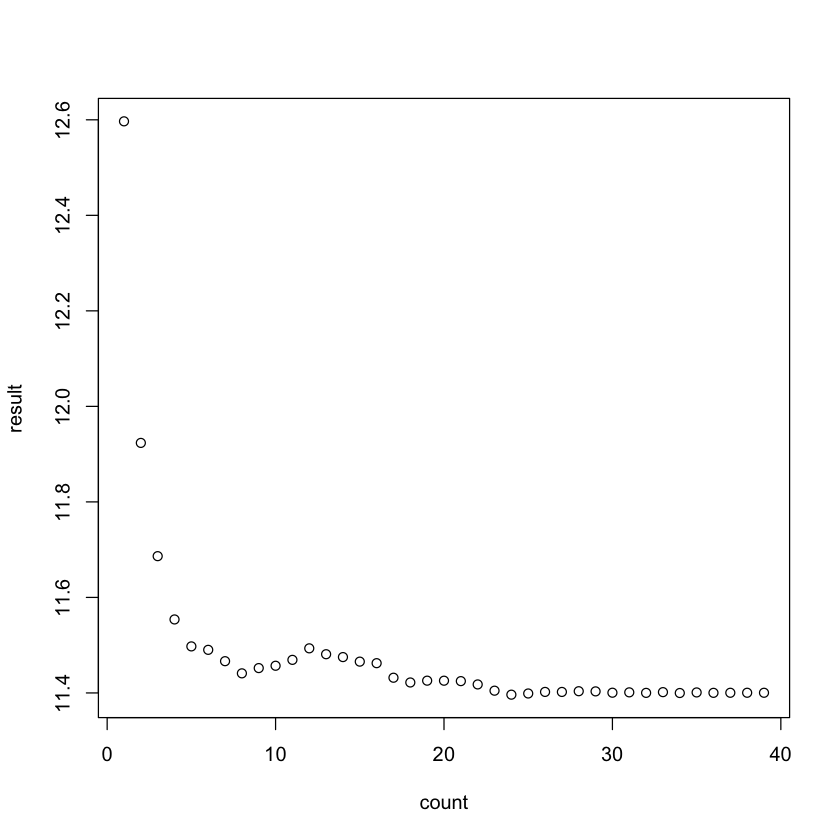

In [12]:
# Perform RFE

features.names <- setdiff(names(wageDT), c("Department",
                                           "Last.Name",
                                           "First.Name",
                                           "Job.Title",
                                           "Department.Seattle.Public.Utilities",
                                           "Count.Negative"))

trainData <- wageDT[idx==1,]
trainData <- trainData[, features.names, with=F]

count <- c()
result <- c()
for (i in 1:(length(trainData) - 1)) {
  lm.all <- lm(Hourly.Rate~., data=trainData)
  resErr <- testData$Hourly.Rate - predict.lm(lm.all, testData)
  result <- c(result, sqrt(sum(resErr^2) / nrow(testData)))
  count <- c(count, length(trainData) - 1)
  pval <- data.frame(summary(lm.all)$coefficients[,4])
  maxInd <- which.max(pval[,1])
  dumb <- gsub('`', '', rownames(pval)[maxInd])
  features.names <- setdiff(features.names, dumb)
  trainData <- trainData[, features.names, with=F]
}


# Plot RMSD as the function of # of features

plot(result~count)

<h3>Q.9. Implement your model as a shiny app.</h3>
<p>In the app, the person should be able to input:</p>
<ul>
<li>Department (as drop-down list)</li>
<li>Gender (as drop-down list)</li>
<li>Job.Title (as drop-down list)</li>
</ul>
<p>and be given expected hourly salary</p>

In [12]:
# For this, create separate app.R file that you should submit together with the Jupyter notebook.